In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.1.0
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.18.1
pandas 0.22.0
sklearn 0.19.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [4]:
model = keras.models.Sequential()
# 卷积层
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                             padding='same',
                             activation='selu',
                             input_shape=(28, 28, 1)))
# 卷积层
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                             padding='same',
                             activation='selu'))
# 池化层
model.add(keras.layers.MaxPool2D(pool_size=2))
# 卷积层
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                             padding='same',
                             activation='selu'))
# 卷积层
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                             padding='same',
                             activation='selu'))
# 池化层
model.add(keras.layers.MaxPool2D(pool_size=2))
# 卷积层
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                             padding='same',
                             activation='selu'))
# 卷积层
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                             padding='same',
                             activation='selu'))
# 池化层
model.add(keras.layers.MaxPool2D(pool_size=2))
# 展平
model.add(keras.layers.Flatten())
# 全连接层
model.add(keras.layers.Dense(128, activation='selu'))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [6]:
logdir = './cnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 143s 3ms/sample - loss: 0.4316 - accuracy: 0.8457 - val_loss: 0.3513 - val_accuracy: 0.8738
Epoch 2/10
55000/55000 [==============================] - 145s 3ms/sample - loss: 0.2877 - accuracy: 0.8969 - val_loss: 0.2788 - val_accuracy: 0.8988
Epoch 3/10
55000/55000 [==============================] - 154s 3ms/sample - loss: 0.2399 - accuracy: 0.9141 - val_loss: 0.2512 - val_accuracy: 0.9116
Epoch 4/10
55000/55000 [==============================] - 145s 3ms/sample - loss: 0.2052 - accuracy: 0.9266 - val_loss: 0.2517 - val_accuracy: 0.9076
Epoch 5/10
55000/55000 [==============================] - 158s 3ms/sample - loss: 0.1784 - accuracy: 0.9353 - val_loss: 0.2354 - val_accuracy: 0.9176
Epoch 6/10
55000/55000 [==============================] - 157s 3ms/sample - loss: 0.1530 - accuracy: 0.9454 - val_loss: 0.2521 - val_accuracy: 0.9118
Epoch 7/10
55000/55000 [===========================

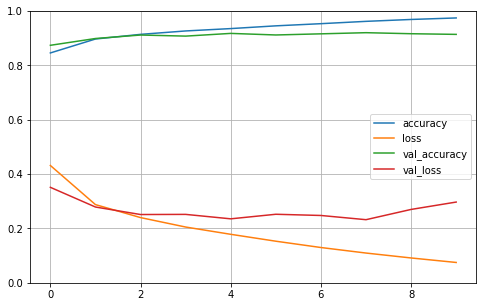

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    
plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 4s 401us/sample - loss: 0.3093 - accuracy: 0.9099


[0.30925562893152236, 0.9099]